# Imagerie médicale

L'IRM cérébrale (imagerie par résonance magnétique) est un examen permettant de détecter des anomalies cérébrales et d'en déterminer les causes.
    
Un des avantages de cette modalité d'imagerie est qu'elle permet de visualiser la matière blanche, la matière grise et le liquide rachidien avec des contrastes différents.


![](https://media1.tenor.com/images/540756001c2405111acb87742f3cd18a/tenor.gif?itemid=9565732)

On verra dans ce qui suit comment pouvoir segmenter ces images. Une étape très importante dans le domaine biomédical.
L'objectif est de séparer les trois classes: 
- matière grise (gm)
- matière blanche (wm)
- liquide céphalorachidien (csf)

## Importer une image

Affichez les fichiers qui se trouvent dans le dossier actuel

In [1]:
ls

Histog_IRM.png      brain.jpg           mask.png
Untitled.ipynb      brain2.jpg          mri_exercice.ipynb
Untitled1.ipynb     mask.bmp            tumor.png


Nous voyons plusiers fichiers en forme image avec les extensions
- `.png`
- `.jpg`
- `.bmp`


Maintenant nous pouvons importer les images dans une matrice 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [9]:
brain = imread('brain.jpg')

La variable `brain` (*cerveau* en anglais) contient une matrice de l'image.  
Regardons sa dimension.

In [10]:
brain.shape

(202, 165, 3)

**Exercice**  
Créez une variable `tumor` et une variable `brain2` et importez les images correspondantes. Affichez leurs dimensions.

## Afficher une image
Affichons maintenant l'image.

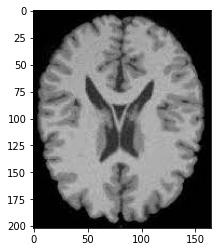

In [11]:
plt.imshow(brain);

**Exercice**  
Affichez les matrices `tumor` et `brain2` comme images.

## Coder l'image en niveaux de gris
Dans ces images les couleurs ne sont pas utiles, elles sont pourtant codées en mode couleurs.
Vérifions que l'image `brain` est codée en mode couleurs.

Au lieu de prendre 3 canaux, on va prendre un seul.

In [12]:
brain = brain[:,:,0]

Affichons sa nouvelle dimension

In [13]:
brain.shape

(202, 165)

Affichons de nouveau cette image noir et blanc

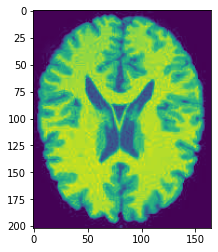

In [14]:
plt.imshow(brain);

## Colormap

La palette de couleur peut être choisie en fonction des besoins de l'affichage.
Essaysons les palettes `gray` et `hot`

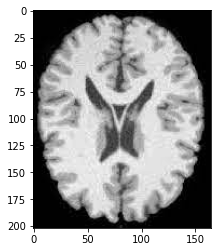

In [15]:
plt.imshow(brain, cmap='gray');

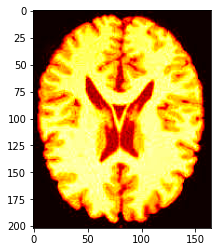

In [16]:
plt.imshow(brain, cmap='hot');

## Histogramme d'une image

L'histogramme d'une image represente la distribution des intensités: 
en abscisse on trouve les intensités et en ordonnée le nombre de fois qu'une intensité apparait dans l'image.

Dans une image IRM la distribution des trois tissus est comme suit:


![](Histog_IRM.png)

Observons l'histogramme de l'image brain avec la fonction hist

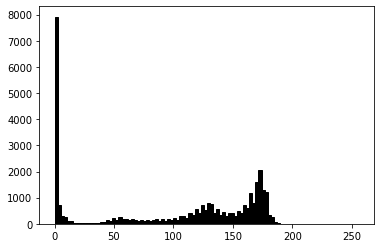

In [17]:
plt.hist(brain.ravel(), bins=100, range=(0.0, 256), fc='k', ec='k');

On rapelle que les trois tissus sont notés par :
- gm (gray matter)
- wm (white matter)
- csf (cerebrospinal fluid)

In [18]:
gm = brain.copy() * 0
wm = brain.copy() * 0 
csf = brain.copy() * 0

for i in range(brain.shape[0]):
    for j in range(brain.shape[1]):
        if 15 <= brain[i,j] < 70:
            csf[i,j] = 1
        elif 70 <= brain[i,j] < 150:
            gm[i,j]  = 1
        elif 150 <= brain[i,j] <= 255:
            wm [i,j] = 1

## Exercice

Modifiez le code ci-dessus en le mettant dans une fonction `classification (img_orig, seuil1, seuil2, seuil3)`
Vérifiez la fonction en l'appelant avec:`gm, wm, csf =classification(brain2, 17,50,150)`


RQ: la fonction retournera les 3 classes gm,wm et csf avec l'instruction `return gm,wm,csf`


Affichez chacune des classes  dans une image; On peut changer les cmap (gray, jet, hsv,Pastel1...)

Affichons les 3 classes dans une même image; puis chacun des tissus cérébraux avec la commande  hstack

In [19]:
gm = gm * 3
wm = wm * 2
segmentation = gm+csf+wm

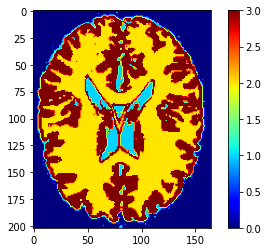

In [21]:
np.unique(segmentation)
plt.imshow(segmentation,cmap = 'jet')

plt.colorbar();

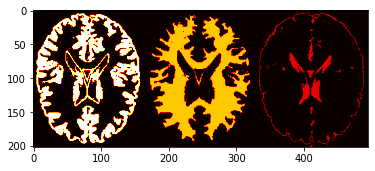

In [23]:
All = np.hstack([gm, wm, csf])
plt.imshow(All, cmap = 'hot');

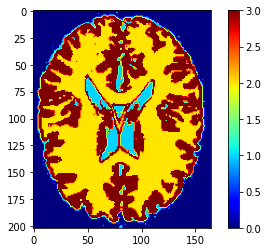

In [29]:
plt.imshow(all, cmap='jet');
plt.colorbar();

## Appliquer un masque à l'image

L'image brain2 contient le crâne et les tissus cérébraux: pour faire la classification enlevons le crâne avec un mask binaire.

L'image mask.jpg contient le masque à appliquer pour extraire seulement le cerveau sans le crâne.




## Exercice

Importez l'image *mask.jpg* et mettez la dans une variable `mask`.

Affichez les dimensions de `brain2` et `mask`.


In [154]:
mask = imread('mask.bmp')

Vérifions que l'image est binaire et gardons un seul canal puisque l'image est en noir et blanc

In [165]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [162]:
mask = mask[:,:,0]

array([  0, 255], dtype=uint8)

changeons `mask` avec les valeurs 0 et 1 pour pouvoir l'appliquer avec une simple multiplication

In [167]:
mask = mask > 0

Vérifions que `mask`contient seulement des 0 et 1 

In [175]:
np.unique(mask)

array([False,  True])

## Exercice

Pour appliquer le mask et extraire le cerveau, créez une variable `brain_only` qui contient la multiplication des deux variables `mask` et `brain2`.

Affichez `brain_only`

Affichez l'histogramme de cette image.

choisir les nouveaux seuils et extraire les 3 tissus avec la fonction `classification`

Affichez chacune des classes

Les 3 ratios *gm/(gm+wm+csf)*, *wm/(gm+wm+csf)* et *csf/(gm+wm+csf)* sont des marqueurs permettent d'analyser les images IRM pour détécter certaines anomalies telles que la dégénérescence cérébrale. Calculez ces ratios pour cette image.


